# <center> Churn Prediction <center/>
    

# Premises

* The bank revenue comes from clients transactions
* We will estimate the average revenue as: 
    * 15% of the client salary, if the their salary is lower than the mean salary of all the bank clients
    * 20% of the client salary, if the their salary is greater or equal the mean salary of all the bank clients

<br>

# The Business Problem:
* Anuanly, part of the bank clients do not renew their contract
* The goal is to predict which clients are more likely to leave ( do not renew their contract)
    

<br>

# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 0.1 Functions

In [2]:
def descriptive_sts(num_attributes):
    # Central Tedency - mean, median
    ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

    #Dispersion - str,min, max,range,skew,kurtosis
    d1 = pd.DataFrame(num_attributes.apply(np.std)).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x : x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x : x.skew())).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x : x.kurtosis())).T

    #Contatenate
    m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
    m.columns = ['attributes', 'min', 'max', 'range','mean','median', 'std','skew','kurtosis']
    return m

## 0.2 Load Data

In [3]:
BUCKET_NAME = 'landing-zone-ds'
FILE_NAME = 'churn.csv'

In [4]:
df_raw = pd.read_csv(os.path.join('gs://', BUCKET_NAME, FILE_NAME))
df_raw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 1.0 Data Description

* RowNumber: corresponds to the record (row) number and has no effect on the output.
* CustomerId: contains random values and has no effect on customer leaving the bank.
* Surname: the surname of a customer has no impact on their decision to leave the bank.
* CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography: a customer’s location can affect their decision to leave the bank.
* Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
* Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* NumOfProducts: refers to the number of products that a customer has purchased through the bank.
* HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* IsActiveMember: active customers are less likely to leave the bank.
* EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited: whether or not the customer left the bank. (0=No,1=Yes)

## 1.1 Data Dimension

In [5]:
df1 = df_raw.copy()

In [6]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 10000
Number of Columns: 14


## 1.2 Data Types

In [7]:
df1.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## 1.3 Check NaN

In [8]:
df1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 1.4 Change Data Types

In [9]:
df1['CustomerId'] = df1['CustomerId'] .astype('str')

## 1.5 Descriptive Statistics

### 1.5.1 Numerical Attributes

In [10]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])

In [11]:
stats_table = descriptive_sts(num_attributes)
stats_table

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,RowNumber,1.00,10000.00,9999.00,5000.500000,5000.500,2886.751332,0.000000,-1.200000
1,CreditScore,350.00,850.00,500.00,650.528800,652.000,96.648466,-0.071607,-0.425726
2,Age,18.00,92.00,74.00,38.921800,37.000,10.487282,1.011320,1.395347
3,Tenure,0.00,10.00,10.00,5.012800,5.000,2.892030,0.010991,-1.165225
4,Balance,0.00,250898.09,250898.09,76485.889288,97198.540,62394.285254,-0.141109,-1.489412
5,NumOfProducts,1.00,4.00,3.00,1.530200,1.000,0.581625,0.745568,0.582981
6,HasCrCard,0.00,1.00,1.00,0.705500,1.000,0.455818,-0.901812,-1.186973
7,IsActiveMember,0.00,1.00,1.00,0.515100,1.000,0.499772,-0.060437,-1.996747
8,EstimatedSalary,11.58,199992.48,199980.90,100090.239881,100193.915,57507.617221,0.002085,-1.181518
9,Exited,0.00,1.00,1.00,0.203700,0.000,0.402748,1.471611,0.165671


### 1.5.2 categorical Attributes

In [12]:
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64'])

In [13]:
cat_attributes.apply(lambda x: x.unique())

CustomerId    [15634602, 15647311, 15619304, 15701354, 15737...
Surname       [Hargrave, Hill, Onio, Boni, Mitchell, Chu, Ba...
Geography                              [France, Spain, Germany]
Gender                                           [Female, Male]
dtype: object

# 2.0 Feature Engineering

In [14]:
df2 = df1.copy()

# 3.0 Data Filtering

In [25]:
df3 = df2.copy()

In [26]:
# As the number of clients is the same as the number of rows, we can drop this column
# RowNumber does not provide useful information (it is a index)
# We can also excluse surname
df3 = df3.drop(['RowNumber','CustomerId' ,'Surname'], axis = 1 )

# 4.0 EDA

## 4.1 Univariate Analysis

In [27]:
df4 = df3.copy()

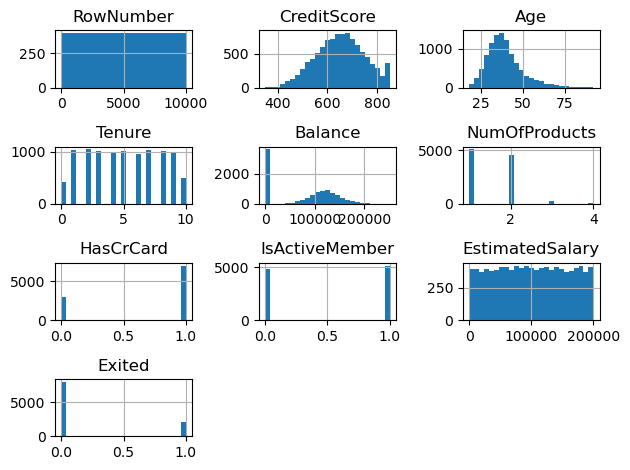

In [64]:
num_attributes.hist(bins = 25);
plt.tight_layout()

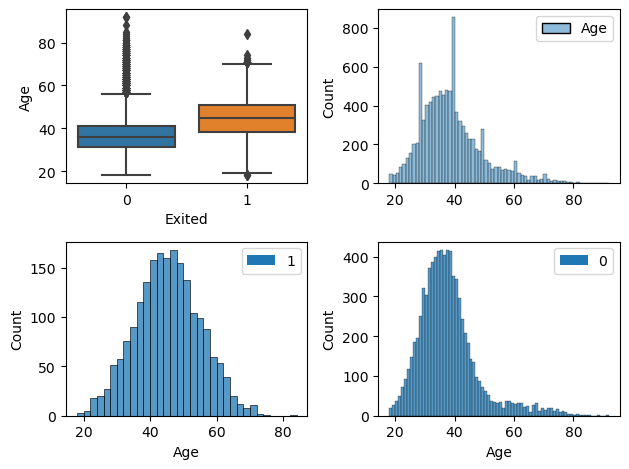

In [71]:
# age
plt.subplot(2,2,1)
sns.boxplot(x = 'Exited', y = 'Age', data = df4)

plt.subplot(2,2,2)
aux = df4[[ 'Age']]
sns.histplot(aux)

plt.subplot(2,2,3)
aux = df4.loc[df4['Exited'] == 1 , 'Age']
sns.histplot(aux)
plt.legend('1')

plt.subplot(2,2,4)
aux = df4.loc[df4['Exited'] == 0 , 'Age']
sns.histplot(aux)
plt.legend('0')

plt.tight_layout()

* The mean age of the churned clients is higher than the mean of the not churned client 
* Age seemss to be a relevant feature

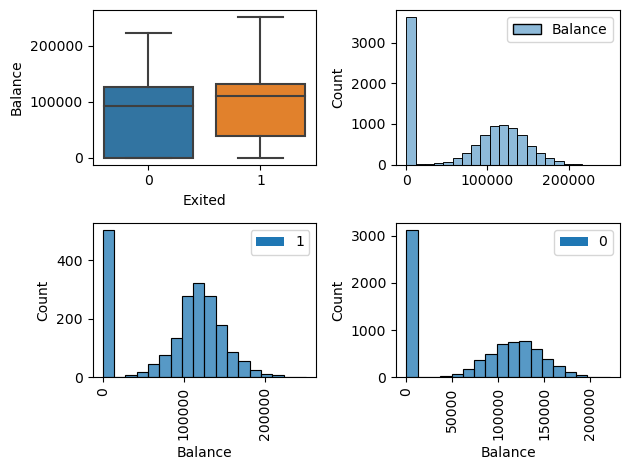

In [77]:
# Balance
plt.subplot(2,2,1)
sns.boxplot(x = 'Exited', y = 'Balance', data = df4)

plt.subplot(2,2,2)
aux = df4[[ 'Balance']]
sns.histplot(aux)

plt.subplot(2,2,3)
aux = df4.loc[df4['Exited'] == 1 , 'Balance']
sns.histplot(aux)
plt.xticks( rotation = 90)
plt.legend('1')

plt.subplot(2,2,4)
aux = df4.loc[df4['Exited'] == 0 , 'Balance']
sns.histplot(aux)
plt.xticks( rotation = 90)
plt.legend('0')

plt.tight_layout()

In [28]:
df4.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 4.1 Multivariate Analysis

# 5.0 Data Preparation

# 6.0 Feature Selection

# 7.0 Machine Learning

# 8.0 Hyperparameter Fine Tune

# 9.0 Error Interpreration

# 10.0 Deploy Model